In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Datasets/compresive_strength_concrete.csv')
data = pd.DataFrame(data)
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [13]:
for column in data:
  data[column].fillna(value = data[column].mean(),inplace = True)
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [14]:
labels = data['Concrete compressive strength(MPa, megapascals) ']
samples = data
del samples['Concrete compressive strength(MPa, megapascals) ']
samples

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [15]:
x1_train = samples.sample(frac = 0.50)
samples = samples.drop(x1_train.index)
x1_test = samples.sample(frac = 0.60)
x1_validate = samples.drop(x1_test.index) 

In [16]:
print(x1_train.shape,x1_test.shape,x1_validate.shape)

(515, 8) (309, 8) (206, 8)


In [17]:
y1_train = labels.sample(frac = 0.50)
labels = labels.drop(y1_train.index)
y1_test = labels.sample(frac = 0.60)
y1_validate = labels.drop(y1_test.index)

In [18]:
print(y1_train.shape,y1_test.shape,y1_validate.shape)

(515,) (309,) (206,)


In [19]:
mean = x1_train.mean(axis = 0)
x1_train = x1_train-mean
std = x1_train.std(axis = 0)
x1_train = x1_train/std
x1_test = x1_test-mean
x1_validate = x1_validate-mean
x1_test = x1_test/std
x1_validate = x1_validate/std

In [20]:
all_scores = []
all_mae_history = []
model = Sequential()
model.add(Dense(8,activation = 'relu',input_shape=(x1_train.shape[1],)))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(6,activation = 'relu'))
model.add(Dense(1,activation = 'relu'))
model.compile(optimizer = 'rmsprop',loss = 'mse' , metrics = ['mae'])
history = model.fit(x1_train,y1_train,validation_data=(x1_validate,y1_validate),epochs = 100,verbose=2)
val_mse,val_mae = model.evaluate(x1_test,y1_test,verbose=0)
all_scores.append(val_mae)
mae_history = history.history['mae']
all_mae_history.append(mae_history)

Epoch 1/100
17/17 - 1s - loss: 1616.1438 - mae: 36.2842 - val_loss: 1424.4357 - val_mae: 34.2708
Epoch 2/100
17/17 - 0s - loss: 1606.9508 - mae: 36.1560 - val_loss: 1414.6787 - val_mae: 34.1323
Epoch 3/100
17/17 - 0s - loss: 1597.2028 - mae: 36.0186 - val_loss: 1405.4130 - val_mae: 33.9988
Epoch 4/100
17/17 - 0s - loss: 1586.6969 - mae: 35.8736 - val_loss: 1394.2273 - val_mae: 33.8387
Epoch 5/100
17/17 - 0s - loss: 1573.9460 - mae: 35.6920 - val_loss: 1381.0059 - val_mae: 33.6485
Epoch 6/100
17/17 - 0s - loss: 1558.2206 - mae: 35.4703 - val_loss: 1362.6018 - val_mae: 33.3823
Epoch 7/100
17/17 - 0s - loss: 1537.9559 - mae: 35.1793 - val_loss: 1341.7375 - val_mae: 33.0778
Epoch 8/100
17/17 - 0s - loss: 1513.8892 - mae: 34.8286 - val_loss: 1316.2494 - val_mae: 32.7006
Epoch 9/100
17/17 - 0s - loss: 1484.2642 - mae: 34.3969 - val_loss: 1285.1498 - val_mae: 32.2352
Epoch 10/100
17/17 - 0s - loss: 1448.9196 - mae: 33.8698 - val_loss: 1247.2328 - val_mae: 31.6574
Epoch 11/100
17/17 - 0s - los

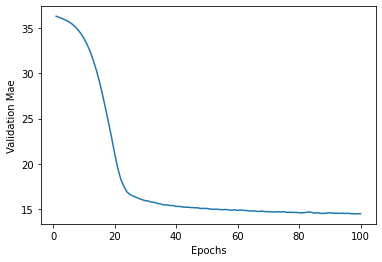

In [21]:
import numpy as np
import matplotlib.pyplot as plt
average = [np.mean([x[i] for x in all_mae_history]) for i in range(100)]
plt.plot(range(1,len(average)+1),average)
plt.xlabel('Epochs')
plt.ylabel('Validation Mae')
plt.show()

In [24]:
model.predict(x1_test).min()

25.251286